In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.drop('id',axis=1, inplace= True)

In [7]:
df.columns = ["Age","BloodPressure","SpecificGravity","Albumin","Sugar","RedBloodCells",   
              "PusCells","PusCellClumps","Bacteria","BloodGlucoseRandom","BloodUrea",
              "Serum Creatinine","Sodium","Potassium","Hemoglobin","PackedCellVolume",
              "WhiteBloodCellCount","RedBloodCellCount","Hypertension","DiabetesMellitus",
              "CoronaryArteryDisease","Appetite","PedalEdema","Anemia","Classification"]

In [8]:
df.describe()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,BloodGlucoseRandom,BloodUrea,Serum Creatinine,Sodium,Potassium,Hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df['PackedCellVolume'].unique()
# due to some string values in the columns it is the object in type

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [10]:
# convert in numeric values
df['PackedCellVolume'] = pd.to_numeric(df['PackedCellVolume'],errors='coerce')
# coerce meaning supress or ignore 

In [11]:
df['WhiteBloodCellCount'] = pd.to_numeric(df['WhiteBloodCellCount'],errors='coerce')

In [12]:
df['RedBloodCellCount'] = pd.to_numeric(df['RedBloodCellCount'],errors='coerce')

In [13]:
categorical = [col for col in df.columns if df[col].dtype == 'object']
numerical = [col for col in df.columns if df[col].dtypes != 'object']

In [14]:
for col in categorical:
    print(f"{col} has {df[col].unique()} values \n")

RedBloodCells has [nan 'normal' 'abnormal'] values 

PusCells has ['normal' 'abnormal' nan] values 

PusCellClumps has ['notpresent' 'present' nan] values 

Bacteria has ['notpresent' 'present' nan] values 

Hypertension has ['yes' 'no' nan] values 

DiabetesMellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

CoronaryArteryDisease has ['no' 'yes' '\tno' nan] values 

Appetite has ['good' 'poor' nan] values 

PedalEdema has ['no' 'yes' nan] values 

Anemia has ['no' 'yes' nan] values 

Classification has ['ckd' 'ckd\t' 'notckd'] values 



In [15]:
df['DiabetesMellitus'].replace(to_replace= {' yes':'yes','\tyes':'yes','\tno':'no'}, inplace=True)

In [16]:
df['DiabetesMellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [17]:
df['CoronaryArteryDisease'].replace(to_replace= {'\tno':'no'},inplace=True)

In [18]:
df['CoronaryArteryDisease'].unique()

array(['no', 'yes', nan], dtype=object)

In [19]:
df['Classification'] = df['Classification'].str.strip()
df['Classification'] = df['Classification'].map({'ckd': 1, 'notckd': 0})

In [20]:
df['Classification'].unique() # both replaceing and converting done

array([1, 0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    391 non-null    float64
 1   BloodPressure          388 non-null    float64
 2   SpecificGravity        353 non-null    float64
 3   Albumin                354 non-null    float64
 4   Sugar                  351 non-null    float64
 5   RedBloodCells          248 non-null    object 
 6   PusCells               335 non-null    object 
 7   PusCellClumps          396 non-null    object 
 8   Bacteria               396 non-null    object 
 9   BloodGlucoseRandom     356 non-null    float64
 10  BloodUrea              381 non-null    float64
 11  Serum Creatinine       383 non-null    float64
 12  Sodium                 313 non-null    float64
 13  Potassium              312 non-null    float64
 14  Hemoglobin             348 non-null    float64
 15  Packed

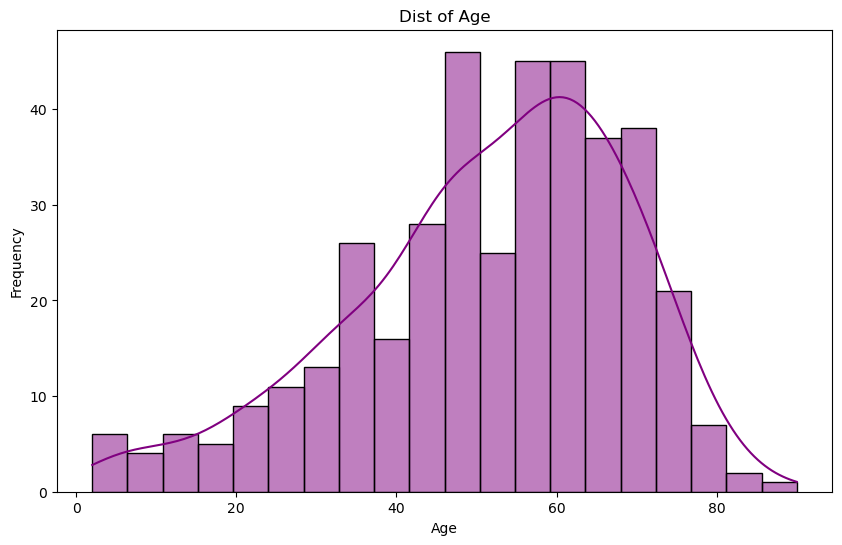

In [22]:
plt.figure(figsize= (10,6))
sns.histplot(df['Age'].dropna(), kde = True, bins = 20, color = 'purple')
plt.title('Dist of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# insights > age is left skewed data

<Axes: xlabel='Hypertension', ylabel='count'>

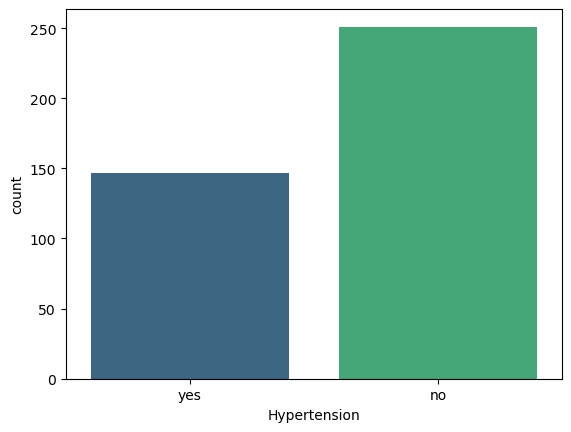

In [23]:
sns.countplot(x= 'Hypertension',data=df,palette='viridis')
# insights >  150 of them has hypertension

In [24]:
df.columns

Index(['Age', 'BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar',
       'RedBloodCells', 'PusCells', 'PusCellClumps', 'Bacteria',
       'BloodGlucoseRandom', 'BloodUrea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'PackedCellVolume', 'WhiteBloodCellCount',
       'RedBloodCellCount', 'Hypertension', 'DiabetesMellitus',
       'CoronaryArteryDisease', 'Appetite', 'PedalEdema', 'Anemia',
       'Classification'],
      dtype='object')

<Axes: xlabel='Classification', ylabel='BloodUrea'>

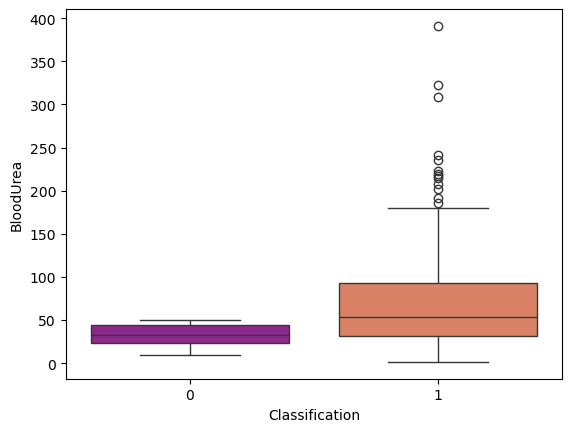

In [25]:
sns.boxplot(x = 'Classification', y = 'BloodUrea', data = df, palette = 'plasma')
# people with lidney disease has higher blood urea with outliers

<Axes: xlabel='Classification', ylabel='Serum Creatinine'>

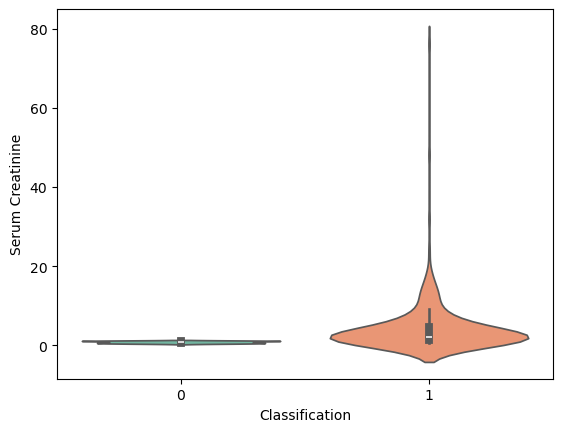

In [26]:
sns.violinplot(x = 'Classification', y = 'Serum Creatinine', data =df, palette = 'Set2')

<Axes: xlabel='Anemia', ylabel='count'>

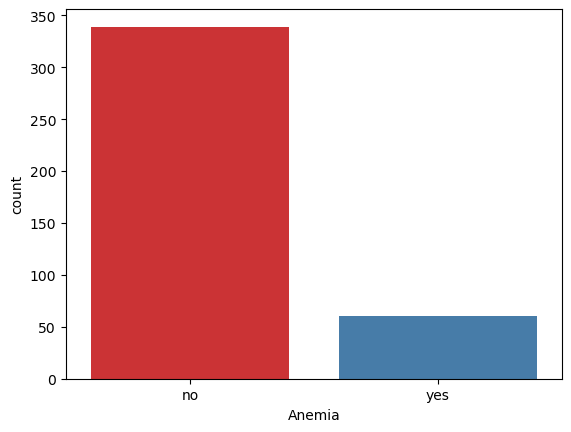

In [27]:
sns.countplot(x = 'Anemia', data = df, palette = 'Set1')

In [28]:
df.columns

Index(['Age', 'BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar',
       'RedBloodCells', 'PusCells', 'PusCellClumps', 'Bacteria',
       'BloodGlucoseRandom', 'BloodUrea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'PackedCellVolume', 'WhiteBloodCellCount',
       'RedBloodCellCount', 'Hypertension', 'DiabetesMellitus',
       'CoronaryArteryDisease', 'Appetite', 'PedalEdema', 'Anemia',
       'Classification'],
      dtype='object')

<Axes: ylabel='count'>

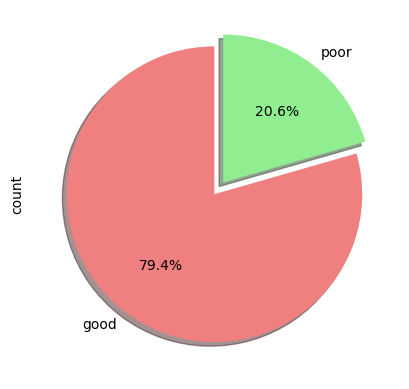

In [29]:
df.Appetite.value_counts().plot.pie(autopct ='%1.1f%%', colors = ['lightcoral','lightgreen'],
                                   explode = (0,0.1), shadow=True, startangle = 90)

<Axes: xlabel='PusCellClumps', ylabel='count'>

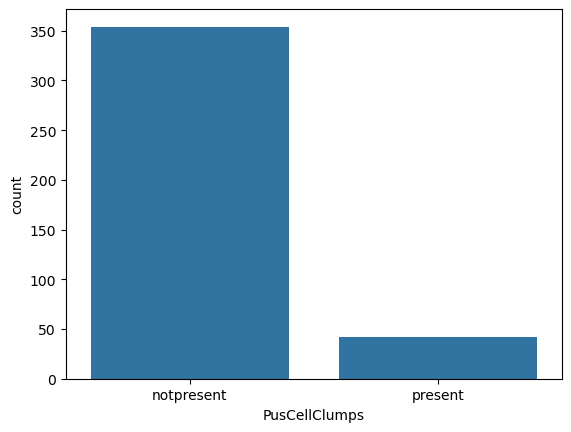

In [30]:
sns.countplot(x ='PusCellClumps', data =df )

<Axes: xlabel='WhiteBloodCellCount', ylabel='Count'>

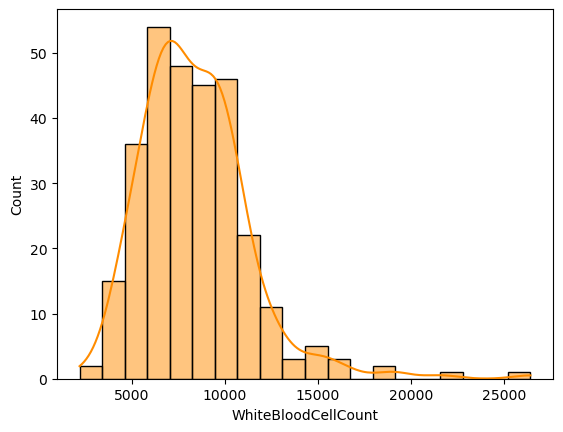

In [31]:
sns.histplot(df['WhiteBloodCellCount'].dropna(), kde = True, bins = 20, color= 'darkorange')

<Axes: ylabel='count'>

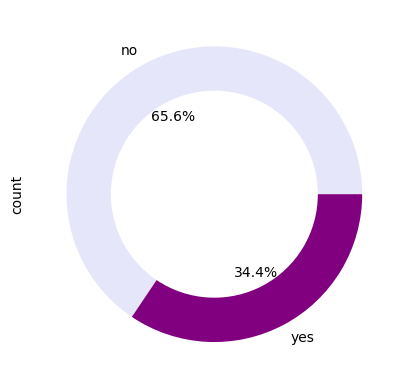

In [32]:
df['DiabetesMellitus'].value_counts().plot.pie(autopct= "%1.1f%%",wedgeprops = dict(width = 0.3),
                                              colors = ['lavender','purple'])

<Axes: xlabel='PedalEdema', ylabel='count'>

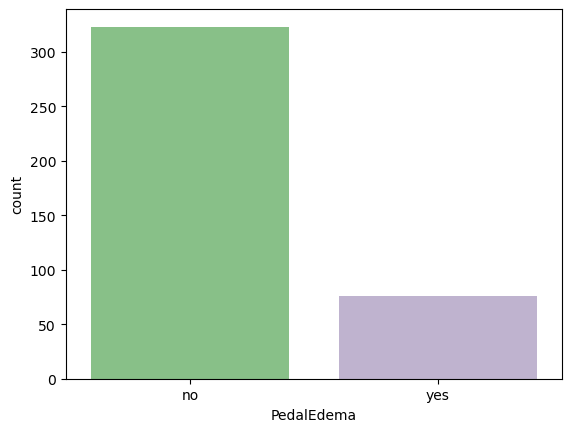

In [33]:
sns.countplot(x = 'PedalEdema', data= df, palette = 'Accent')

<Axes: xlabel='Bacteria', ylabel='count'>

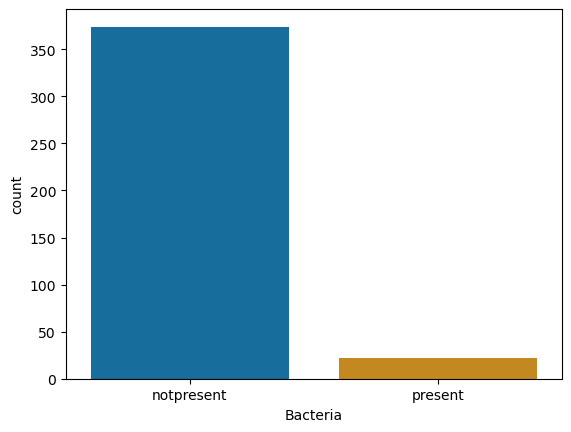

In [34]:
sns.countplot(x = 'Bacteria', data= df, palette = 'colorblind')

<Axes: xlabel='Age', ylabel='BloodPressure'>

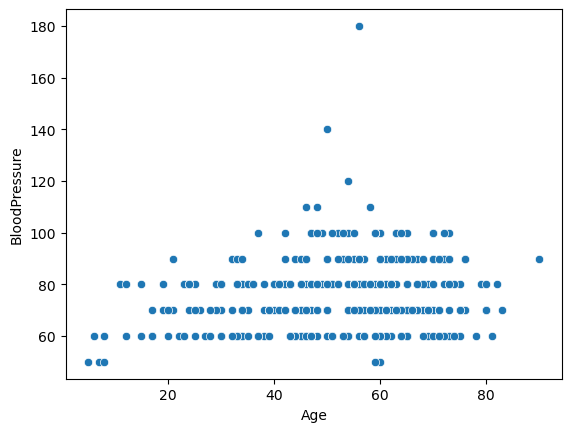

In [35]:
sns.scatterplot(x = 'Age', y = 'BloodPressure', data = df)

<Axes: xlabel='Age', ylabel='BloodPressure'>

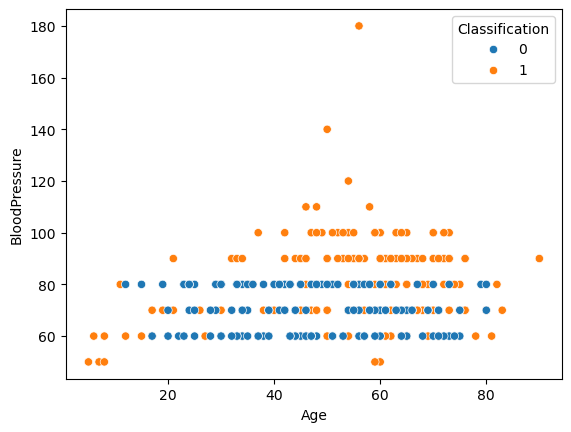

In [36]:
sns.scatterplot(x = 'Age', y = 'BloodPressure', hue = 'Classification' , data = df)

<Axes: xlabel='DiabetesMellitus', ylabel='Albumin'>

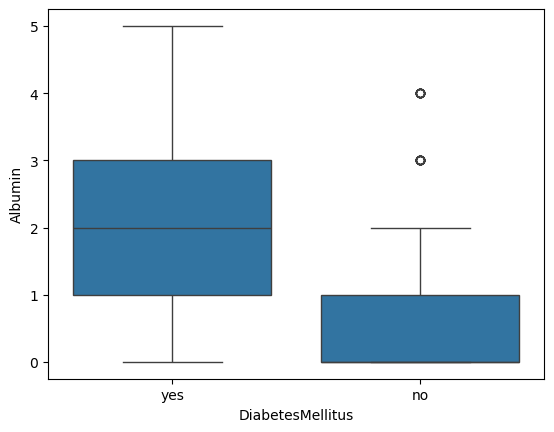

In [37]:
sns.boxplot(x = 'DiabetesMellitus', y = 'Albumin' , data = df )

<Axes: xlabel='DiabetesMellitus', ylabel='Albumin'>

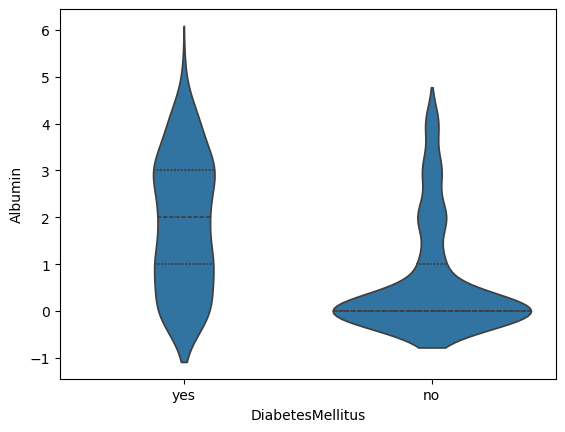

In [38]:
sns.violinplot(x = 'DiabetesMellitus', y = 'Albumin' , data = df ,inner='quartile')

In [39]:
# stacked bar chart
pd.crosstab(df['DiabetesMellitus'],df['Hypertension'])
# crosstab summaries the data

Hypertension,no,yes
DiabetesMellitus,,
no,220,41
yes,31,106


<Axes: xlabel='DiabetesMellitus'>

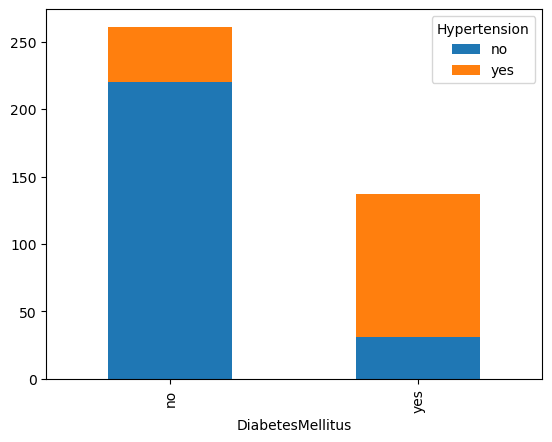

In [40]:
diabetes_hypertension = pd.crosstab(df['DiabetesMellitus'],df['Hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True)

In [41]:
df.columns

Index(['Age', 'BloodPressure', 'SpecificGravity', 'Albumin', 'Sugar',
       'RedBloodCells', 'PusCells', 'PusCellClumps', 'Bacteria',
       'BloodGlucoseRandom', 'BloodUrea', 'Serum Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'PackedCellVolume', 'WhiteBloodCellCount',
       'RedBloodCellCount', 'Hypertension', 'DiabetesMellitus',
       'CoronaryArteryDisease', 'Appetite', 'PedalEdema', 'Anemia',
       'Classification'],
      dtype='object')

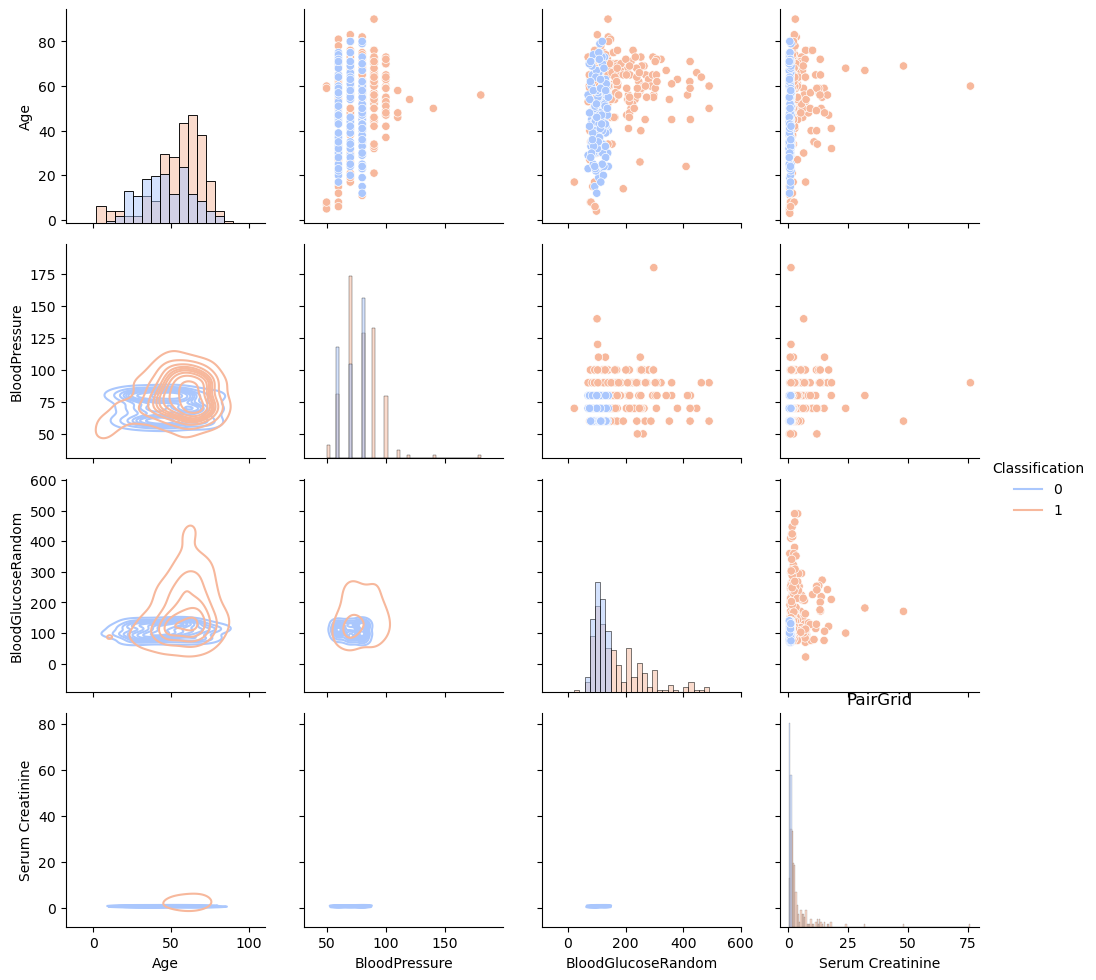

In [43]:
cols = ['Age','BloodPressure','BloodGlucoseRandom','Serum Creatinine','Classification']
g = sns.PairGrid(df[cols], hue = 'Classification', palette = 'coolwarm')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.map_diag(sns.histplot)
g.add_legend()
plt.title('PairGrid')
plt.show()

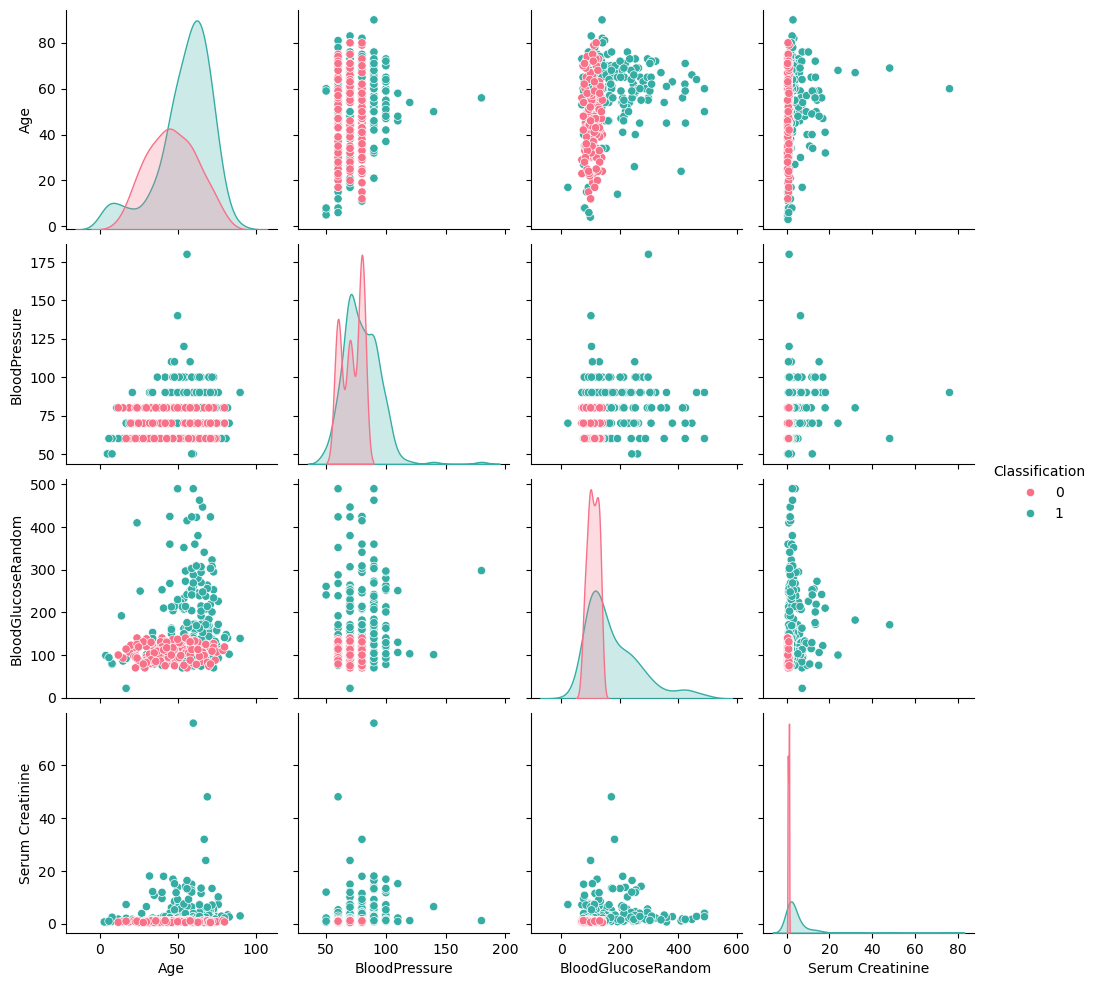

In [44]:
sns.pairplot(df[cols], hue = 'Classification', palette = 'husl')

In [45]:
df.corr(numeric_only = True)

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,BloodGlucoseRandom,BloodUrea,Serum Creatinine,Sodium,Potassium,Hemoglobin,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Classification
Age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
BloodPressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
SpecificGravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
Albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
Sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
BloodGlucoseRandom,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
BloodUrea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
Serum Creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
Sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
Potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


<Axes: >

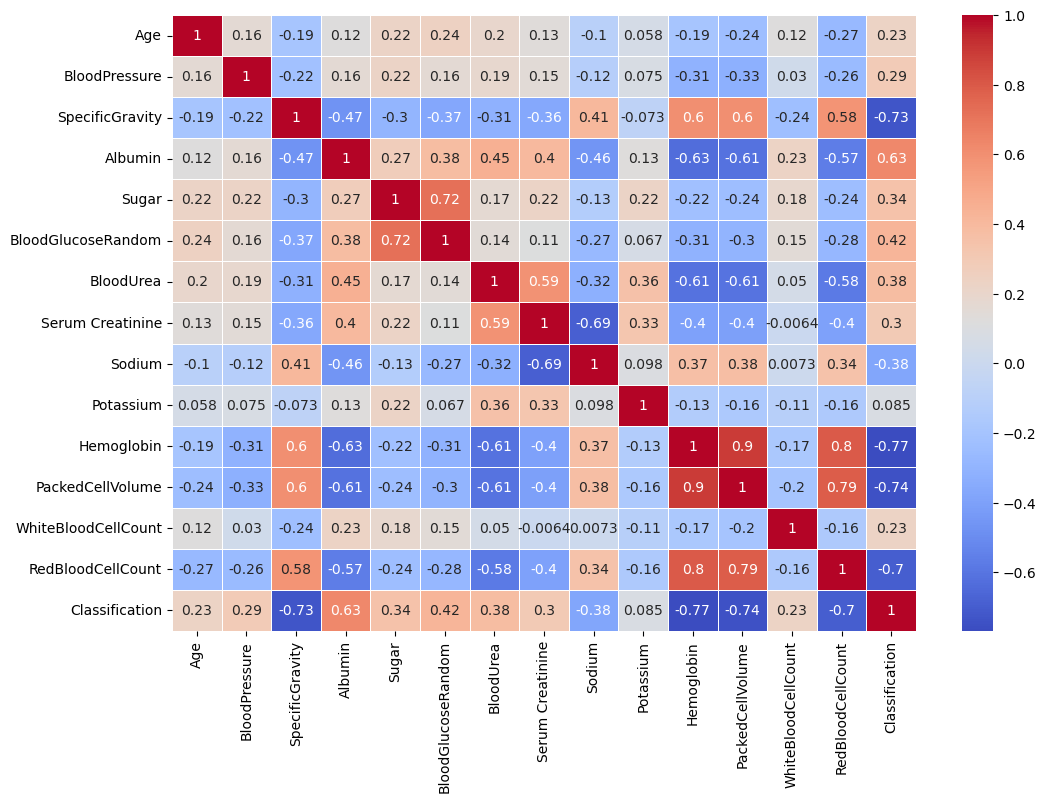

In [46]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True , cmap = 'coolwarm', linewidths= 0.5)

<Axes: xlabel='DiabetesMellitus', ylabel='Age'>

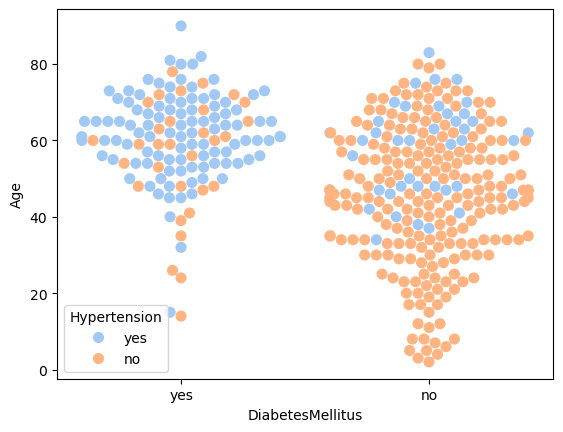

In [47]:
sns.swarmplot(x = 'DiabetesMellitus', y = 'Age', hue = 'Hypertension', data = df, 
              palette = 'pastel', size = 8)

In [ ]:
# swarmplot allows you to see all the overlapping data as well 

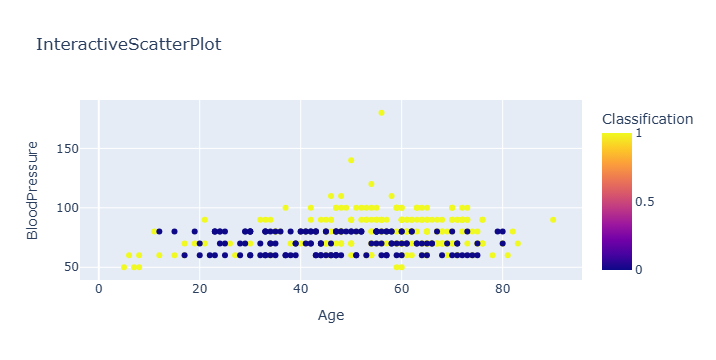

In [49]:
fig = px.scatter(df, x = 'Age', y = 'BloodPressure', color = 'Classification', 
                 hover_data = ['Serum Creatinine','Hemoglobin'], title = 'InteractiveScatterPlot')
fig.show()

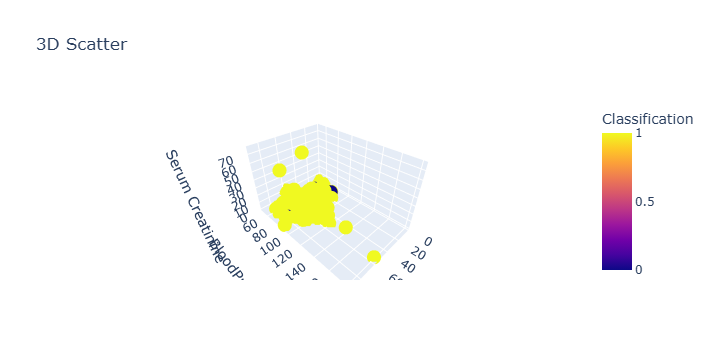

In [50]:
fig = px.scatter_3d(df, x = 'Age', y = 'BloodPressure', z = 'Serum Creatinine', 
                    color = 'Classification', title = '3D Scatter')
fig.show()

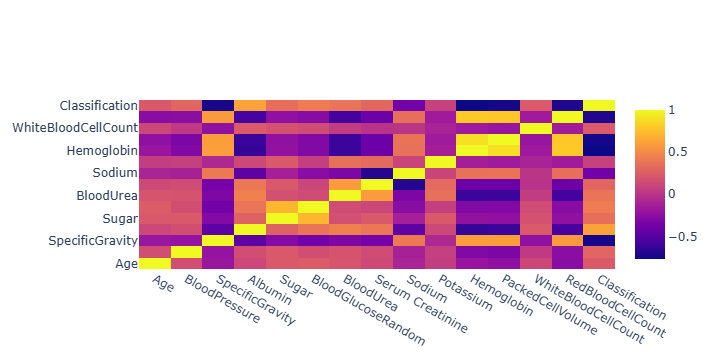

In [52]:
import plotly.graph_objects as go

corr = df.corr(numeric_only = True)
Fig = go.Figure(data = go.Heatmap(z = corr.values, x = corr.columns, y = corr.index))
Fig.show()

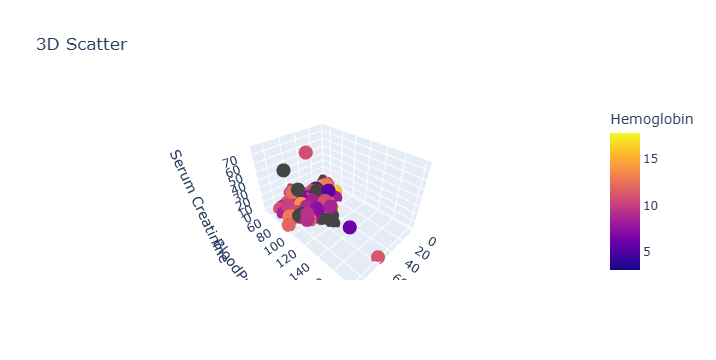

In [53]:
fig = px.scatter_3d(df, x = 'Age', y = 'BloodPressure', z = 'Serum Creatinine', 
                    color = 'Hemoglobin', title = '3D Scatter')
fig.show()

In [54]:
df.isnull().sum()

Age                        9
BloodPressure             12
SpecificGravity           47
Albumin                   46
Sugar                     49
RedBloodCells            152
PusCells                  65
PusCellClumps              4
Bacteria                   4
BloodGlucoseRandom        44
BloodUrea                 19
Serum Creatinine          17
Sodium                    87
Potassium                 88
Hemoglobin                52
PackedCellVolume          71
WhiteBloodCellCount      106
RedBloodCellCount        131
Hypertension               2
DiabetesMellitus           2
CoronaryArteryDisease      2
Appetite                   1
PedalEdema                 1
Anemia                     1
Classification             0
dtype: int64

In [55]:
categorical

['RedBloodCells',
 'PusCells',
 'PusCellClumps',
 'Bacteria',
 'Hypertension',
 'DiabetesMellitus',
 'CoronaryArteryDisease',
 'Appetite',
 'PedalEdema',
 'Anemia',
 'Classification']

In [56]:
numerical

['Age',
 'BloodPressure',
 'SpecificGravity',
 'Albumin',
 'Sugar',
 'BloodGlucoseRandom',
 'BloodUrea',
 'Serum Creatinine',
 'Sodium',
 'Potassium',
 'Hemoglobin',
 'PackedCellVolume',
 'WhiteBloodCellCount',
 'RedBloodCellCount']

In [57]:
median = df[numerical].median()
df[numerical] = df[numerical].fillna(median)

In [58]:
df[numerical].isna().sum()

Age                    0
BloodPressure          0
SpecificGravity        0
Albumin                0
Sugar                  0
BloodGlucoseRandom     0
BloodUrea              0
Serum Creatinine       0
Sodium                 0
Potassium              0
Hemoglobin             0
PackedCellVolume       0
WhiteBloodCellCount    0
RedBloodCellCount      0
dtype: int64

In [59]:
mode = df.mode().iloc[0]
df[categorical] = df[categorical].fillna(mode)

In [60]:
df[categorical].isna().sum()

RedBloodCells            0
PusCells                 0
PusCellClumps            0
Bacteria                 0
Hypertension             0
DiabetesMellitus         0
CoronaryArteryDisease    0
Appetite                 0
PedalEdema               0
Anemia                   0
Classification           0
dtype: int64

In [61]:
# few columns are object , convert obj to numerical

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical:
    df[col] = label_encoder.fit_transform(df[col])

In [62]:
df.head()

,Age,BloodPressure,SpecificGravity,Albumin,Sugar,RedBloodCells,PusCells,PusCellClumps,Bacteria,BloodGlucoseRandom,...,PackedCellVolume,WhiteBloodCellCount,RedBloodCellCount,Hypertension,DiabetesMellitus,CoronaryArteryDisease,Appetite,PedalEdema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [63]:
df.dtypes

Age                      float64
BloodPressure            float64
SpecificGravity          float64
Albumin                  float64
Sugar                    float64
RedBloodCells              int64
PusCells                   int64
PusCellClumps              int64
Bacteria                   int64
BloodGlucoseRandom       float64
BloodUrea                float64
Serum Creatinine         float64
Sodium                   float64
Potassium                float64
Hemoglobin               float64
PackedCellVolume         float64
WhiteBloodCellCount      float64
RedBloodCellCount        float64
Hypertension               int64
DiabetesMellitus           int64
CoronaryArteryDisease      int64
Appetite                   int64
PedalEdema                 int64
Anemia                     int64
Classification             int64
dtype: object

In [ ]:
x = df.